In [134]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# 운영체제 플랫폼 구별 및 한글 폰트 설정
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family= 'AppleGothic')
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print('Not Support')

Windows OS


In [135]:
df = pd.read_excel('../DATA_WOO/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
df.head(10)

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2022-06                1호선                150                서울역   
1            2022-06                1호선                151                 시청   
2            2022-06                1호선                152                 종각   
3            2022-06                1호선                153               종로3가   
4            2022-06                1호선                154               종로5가   
5            2022-06                1호선                155                동대문   
6            2022-06                1호선                156                신설동   
7            2022-06                1호선                157                제기동   
8            2022-06                1호선                158       청량리(서울시립대입구)   
9            2022-06                1호선                159                동묘앞   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               646  24             8,433  7,694            12,608  46,963   
1               271   7             3,133  4,802             3,321  23,621   
2                91   9             4,007  3,960             3,682  22,533   
3               190  12             3,882  3,261             3,570  14,038   
4                34   0             1,730  3,909             2,986  16,406   
5               890  31            11,300  2,056             8,821   7,698   
6               370  19             8,467  2,653             8,568  11,348   
7               441   2             4,888  2,214             8,551   9,419   
8               887  14            10,765  4,593            14,934  22,471   
9               170   3             2,827  1,104             3,321   5,042   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59      \
   ...                하차                승차     하차                승차  하차   
0  ...            15,480               158  1,332                 1   4   
1  ...             2,938                72    422                 0   2   
2  ...             3,590               315    394                 0   1   
3  ...             4,119               310    843                 3   3   
4  ...             2,628                98    668                 0   0   
5  ...             8,677                25  1,595                 0   0   
6  ...             7,832               232  1,578                 1  12   
7  ...             6,711                42    780                 1   1   
8  ...             9,765                84  1,613                 0   0   
9  ...             3,604                31  2,129                 0   0   

  02:00:00~02:59:59    03:00:00~03:59:59                    작업일시  
                 승차 하차                승차 하차  Unnamed: 52_level_1  
0                 0  1                 0  0  2022-07-03 09:48:05  
1                 0  0                 0  0  2022-07-03 09:48:05  
2                 0  0                 0  0  2022-07-03 09:48:05  
3                 0  0                 0  0  2022-07-03 09:48:05  
4                 0  0                 0  0  2022-07-03 09:48:05  
5                 0  0                 0  0  2022-07-03 09:48:05  
6                 0  0                 0  0  2022-07-03 09:48:05  
7                 0  0                 0  0  2022-07-03 09:48:05  
8                 0  0                 0  0  2022-07-03 09:48:05  
9                 1  0                 0  0  2022-07-03 09:48:05  

[10 rows x 53 columns]

In [136]:
subway_df = df.iloc[:,[1,3,11,13]].copy()
subway_df

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,하차,하차
0,1호선,서울역,"100,397","201,687"
1,1호선,시청,"62,427","179,710"
2,1호선,종각,"95,376","235,160"
3,1호선,종로3가,"25,469","68,699"
4,1호선,종로5가,"41,304","96,113"
...,...,...,...,...
610,신림선,당곡,"1,981","5,511"
611,신림선,신림,"1,075","1,704"
612,신림선,서원,977,"1,319"


In [137]:
subway_df.dtypes  # 숫자인 문자열을 int로 바꿔준다. 
subway_df[('07:00:00~07:59:59', '하차')] = subway_df[('07:00:00~07:59:59', '하차')].apply(lambda x: x.replace(',',''))
subway_df[('08:00:00~08:59:59', '하차')] = subway_df[('08:00:00~08:59:59', '하차')].apply(lambda x: x.replace(',',''))

# 데이터 타입 변경: astype('int64')
subway_df[('07:00:00~07:59:59', '하차')] = subway_df[('07:00:00~07:59:59', '하차')].astype('int64')
subway_df[('08:00:00~08:59:59', '하차')] = subway_df[('08:00:00~08:59:59', '하차')].astype('int64')

subway_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  하차                     int64
08:00:00~08:59:59  하차                     int64
dtype: object

출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명입니다.


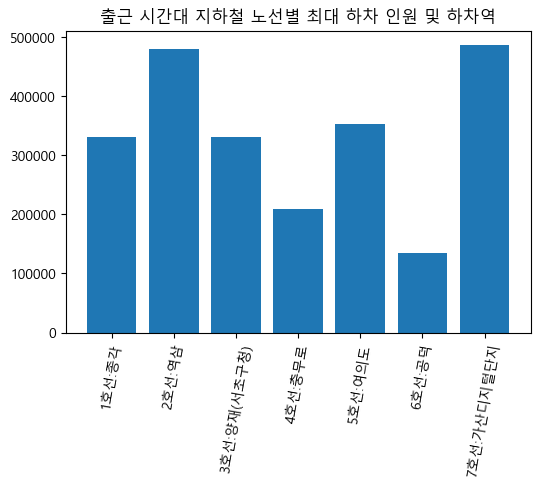

In [143]:

def make(n):
    row_max = []  # y축 max값을 담을 리스트
    label = []   # x축 값을 담을 라벨
    
    for i in range(1,n):
        cond = subway_df[('호선명', 'Unnamed: 1_level_1')] == f'{i}호선'
        row_sum = subway_df[cond].sum(axis=1, numeric_only=True)
        row_max.append(row_sum.max())
        max_idx = row_sum.idxmax()
        max_line, max_station = subway_df.iloc[max_idx, [0,1] ]
        label.append(max_line +":" + max_station)      
        print(f'출근 시간대 {i}호선 최대 하차역은 {max_station}역이고 하차인원은 {row_sum.max():,}명입니다.')
    
    plt.figure(dpi=100)
    plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
    plt.bar(range(len(row_max)), row_max)
    plt.xticks(range(len(row_max)),	label,	rotation=80)
    plt.show()

make(8)

